<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Preambles" data-toc-modified-id="Preambles-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Preambles</a></span><ul class="toc-item"><li><span><a href="#Single-qubit" data-toc-modified-id="Single-qubit-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Single qubit</a></span></li></ul></li><li><span><a href="#Test-using-propagator" data-toc-modified-id="Test-using-propagator-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Test using propagator</a></span></li><li><span><a href="#Evolve-using-master-equation-solver" data-toc-modified-id="Evolve-using-master-equation-solver-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Evolve using master equation solver</a></span><ul class="toc-item"><li><span><a href="#Extract-PTM" data-toc-modified-id="Extract-PTM-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Extract PTM</a></span></li><li><span><a href="#Three-qubits" data-toc-modified-id="Three-qubits-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Three qubits</a></span></li></ul></li></ul></div>

# Preambles

/Users/longnguyen/Documents/GitHub/qtrl/qtrl/benchmarking/tomography.py:297: SyntaxWarning: "is not" with a literal. Did you mean "!="?
  if p is not 'I':
/Users/longnguyen/Documents/GitHub/qtrl/qtrl/sequencer/library_tools.py:35: SyntaxWarning: "is not" with a literal. Did you mean "!="?
  prefix is not '' or suffix is not '') else 90
/Users/longnguyen/Documents/GitHub/qtrl/qtrl/sequencer/library_tools.py:35: SyntaxWarning: "is not" with a literal. Did you mean "!="?
  prefix is not '' or suffix is not '') else 90
/Users/longnguyen/Documents/GitHub/qtrl/qtrl/sequencer/library_tools.py:37: SyntaxWarning: "is not" with a literal. Did you mean "!="?
  prefix is not '' or suffix is not '') else 180
/Users/longnguyen/Documents/GitHub/qtrl/qtrl/sequencer/library_tools.py:37: SyntaxWarning: "is not" with a literal. Did you mean "!="?
  prefix is not '' or suffix is not '') else 180


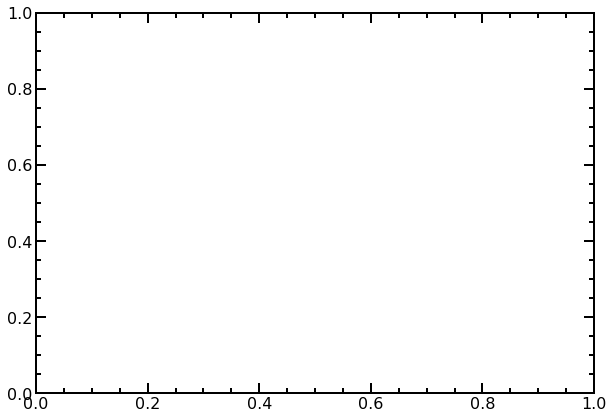

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from qutip import*
from scipy.special import eval_hermite as hpoly
import sys
sys.path.append('/Users/longnguyen/Documents/GitHub/Fluxonium_berkeley/')
from Fluxonium_hamiltonians import Single_small_junction as fluxonium
from Fluxonium_hamiltonians import qchard_pshapes as pshapes
from Fluxonium_hamiltonians import qchard_evolgates as gates
import plotting_settings
import scipy.linalg
from Fluxonium_hamiltonians import qchard_rotope as op
sys.path.append('/Users/longnguyen/Documents/GitHub/qtrl/')
from qtrl.benchmarking import tomography

## Single qubit

In [18]:
#Define qubit
wq = 5
H_nodrive = 0.5*wq*sigmaz()
H_drive = 0.5*sigmax()

#Define drive
wd=wq
T_gate = 100
# T_rise = 50
shape = 'gauss'
drive_freq = wq
t_points = np.linspace(0, T_gate, 2 * int(T_gate) + 1)

#Decoherence
def c_ops_func(t1, t2):
    gamma1 = t1**(-1.0)
    gamma2 = t2**(-1.0)
    gamma_phi = gamma2 - gamma1/2.0
    c1 = np.sqrt(gamma1)*(sigmam())
    c2 = np.sqrt(gamma_phi/2.0) *(sigmaz())
    return [c1, c2]

# Test using propagator

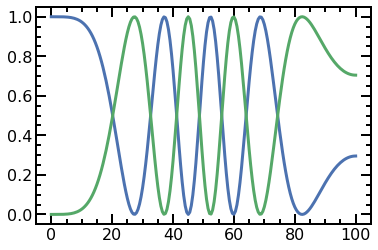

In [19]:
#Evolve using propagator
# c_ops = c_ops(1e3, 1e3)
U_ideal = sigmax()
state_0 = basis(2,0)
state_1 = basis(2,1)
P0 = state_0*state_0.dag()
P1 = state_1*state_1.dag()

coupl = 10 #MHz
coupl = coupl*2*np.pi*1e-3
# H_dummy = 0*sigmax()
# U_nothing = gates.evolution_operator_microwave(H_nodrive, H_dummy, t_points=t_points,T_gate=T_gate, T_rise = T_rise, shape=shape, omega_d=drive_freq, parallel = True)
U_t = gates.evolution_operator_microwave_nonorm(-H_nodrive, H_drive, t_points=t_points,T_gate=T_gate, T_rise = T_rise, shape=shape, omega_d=drive_freq, parallel = True)

# u0 = U_t[-1].matrix_element(state_0, state_0)
# u1 = U_t[-1].matrix_element(state_1, state_1)

# phase = np.angle(u1/u0)
# single_qu_z = 0
# single_qu_z = single_qu_z + state_0*state_0.dag()
# single_qu_z = single_qu_z + np.exp(-1.0j*phase)*state_1*state_1.dag()
# U_real = single_qu_z*U_t[-1]
U_real = U_t[-1]
# U_real = U_nothing * U_t
# U_real = U_real[-1]
    
plt.plot(t_points, expect(P0,U_t*state_0))
plt.plot(t_points, expect(P1,U_t*state_0))

# op1 = U_real.dag() * U_real
# op2 = U_real * U_ideal.dag()
# fidel = (op1.tr() + (abs(op2.tr())) ** 2) / 6.0
# print (fidel)

# Evolve using master equation solver

0.9391617014589823
0.939161701767674


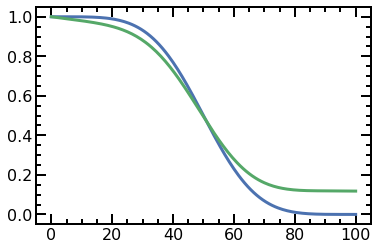

In [22]:
t1 = 5e2
t2 = 2e2
psi_ini = state_0
evol_states_ideal = gates.evolution_psi_microwave_diss(H_nodrive, H_drive, psi0 =psi_ini, t_points=t_points, c_ops = [],
                                            T_gate=T_gate, shape=shape, omega_d=drive_freq)
plt.plot(t_points, expect(P0,evol_states_ideal))

evol_states_real = gates.evolution_psi_microwave_diss(H_nodrive, H_drive, psi0 =psi_ini, t_points=t_points, c_ops = c_ops_func(t1, t2),
                                            T_gate=T_gate, shape=shape, omega_d=drive_freq)
plt.plot(t_points, expect(P0,evol_states_real))

rho_ideal = ket2dm(evol_states_ideal[-1])
rho_real = evol_states_real[-1]
print (qutip.fidelity(rho_ideal, rho_real))
fidel = (rho_real.sqrtm() * rho_ideal * rho_real.sqrtm()).sqrtm().tr()
print (abs(fidel))

## Extract PTM

<ipython-input-38-c78a7e13eebe>:3: DeprecationWarning: Importing functions/classes of the qip submodule directly from the namespace qutip is deprecated. Please import them from the submodule instead, e.g.
from qutip.qip.operations import cnot
from qutip.qip.circuit import QubitCircuit

  prep_ops = [qeye(2), ry(-np.pi/2.0), rx(np.pi/2.0), sigmax()]


(0.7942279711015473+0j)
(0.6835634948211142+0j)
(0.7665212067727092+0j)
(0.7711586432620341+0j)
[[ 1.00000000e+00+0.00000000e+00j  1.27063709e-04+3.46944695e-18j
   3.46809102e-02+2.16840434e-19j -6.46310549e-03+0.00000000e+00j]
 [ 9.42153587e-05+0.00000000e+00j  9.99367994e-01+0.00000000e+00j
  -1.31424325e-04+0.00000000e+00j  4.36479498e-03+0.00000000e+00j]
 [-3.46739182e-02+0.00000000e+00j -1.30543896e-04+0.00000000e+00j
  -9.99978386e-01+0.00000000e+00j -9.68409427e-04+0.00000000e+00j]
 [ 6.50107115e-03+0.00000000e+00j  4.36565397e-03-1.73472348e-18j
   1.19269065e-03+0.00000000e+00j -9.99388428e-01+0.00000000e+00j]]


/Users/longnguyen/Documents/GitHub/qtrl/qtrl/benchmarking/tomography.py:567: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  pm = np.linalg.lstsq(p_out, p_in)[0]


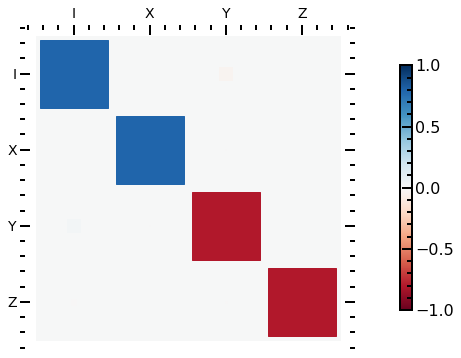

In [38]:
states_in = []
states_out = []
prep_ops = [qeye(2), ry(-np.pi/2.0), rx(np.pi/2.0), sigmax()]

for i, prep in enumerate(prep_ops):
    psi_in = prep*state_0
    
    evol_states = gates.evolution_psi_microwave_diss(H_nodrive, H_drive, psi0 = psi_in, t_points=t_points, c_ops = c_ops_func(t1, t2),
                                            T_gate=T_gate, shape=shape, omega_d=drive_freq)
    
    psi_in = np.array(ket2dm(psi_in))
#     print (psi_in)
    states_in.append(psi_in)
    psi_out = np.array(evol_states[-1])
    states_out.append(psi_out)
    print ((psi_out@psi_out).trace())

ptm_real = tomography.get_process_matrix(states_in, states_out, physical=True)
op_label = ["I","X","Y","Z"]
qutip.hinton(ptm_real, xlabels = op_label, ylabels = op_label)  
print(ptm_real)

(1+0j)
(1+0j)
(1+0j)
(1+0j)
[[ 1.00000000e+00+0.j  2.77555756e-17+0.j -1.38777878e-16+0.j
  -2.46519033e-32+0.j]
 [-7.85046229e-17+0.j  1.00000000e+00+0.j  0.00000000e+00+0.j
  -3.79053851e-16+0.j]
 [-7.85046229e-17+0.j -5.79112885e-17+0.j -1.00000000e+00+0.j
  -6.50353591e-17+0.j]
 [ 5.55111512e-17+0.j  1.27413929e-17+0.j  8.73009598e-17+0.j
  -1.00000000e+00+0.j]]


/Users/longnguyen/Documents/GitHub/qtrl/qtrl/benchmarking/tomography.py:567: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  pm = np.linalg.lstsq(p_out, p_in)[0]


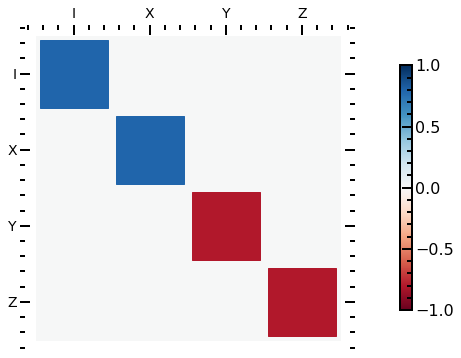

In [36]:
#Ideal case
gate = sigmax()
states_in = []
states_out = []
for i, prep in enumerate(prep_ops):
    psi_in = prep*state_0
    psi_out = np.array(ket2dm(gate*psi_in))
    psi_in = np.array(ket2dm(psi_in))
    states_in.append(psi_in)
    states_out.append(psi_out)
    print ((psi_out@psi_out).trace())

ptm_ideal = tomography.get_process_matrix(states_in, states_out, physical=False)
op_label = ["I","X","Y","Z"]
qutip.hinton(ptm_ideal, xlabels = op_label, ylabels = op_label)
print (ptm_ideal)
# print (tomography.process_fidelity(ptm_real, ptm_ideal))

In [11]:
def get_process_matrix(states_in, states_out, physical=True):
    """
    Extract Pauli Transfer Matrix from measurements, described by input density matrices and output density-matrices
    :param states_in:   array-like, list of input density matrices
    :param states_out:  array-like, list of input density matrices
    :param physical     bool, whether to enforce physicality constraints on the Pauli Transfer Matrix
    :return:            matrix-like, Pauli transfer matrix based on input to output state mapping
    """
    n = int(np.log2(np.sqrt(len(states_in))))
    basis_str = list(map(''.join, product(*[["I", 'X', 'Y', 'Z']] * n)))
    orth_norm_herm_basis = {'I': np.eye(2),
                            'X': sigmax,
                            'Y': sigmay,
                            'Z': sigmaz}

    n_qubit_basis = []
    for base in basis_str:
        op_list = [orth_norm_herm_basis[k] for k in list(base)]
        n_qubit_basis.append(tensor(*op_list))
    n_qubit_basis = np.array(n_qubit_basis)
    # represent the input, output density matrices in the Pauli basis
    p_in = np.array([np.linalg.solve(n_qubit_basis.T.reshape(4 ** n, 4 ** n), x.reshape(-1)) for x in states_in])
    p_out = np.array([np.linalg.solve(n_qubit_basis.T.reshape(4 ** n, 4 ** n), x.reshape(-1)) for x in states_out])
    pm = np.linalg.lstsq(p_out, p_in)[0]
    if physical:  # whether to enforce physicality constraints on the Pauli Transfer Matrix
        choi_matrix = ptm_to_choi(pm)
        choi_physical = project_and_normalize_density_matrix(choi_matrix)
        pm_physical = choi_to_ptm(choi_physical)
        pm = pm_physical
    return pm

<ipython-input-12-cb473937e0d1>:1: DeprecationWarning: Importing functions/classes of the qip submodule directly from the namespace qutip is deprecated. Please import them from the submodule instead, e.g.
from qutip.qip.operations import cnot
from qutip.qip.circuit import QubitCircuit

  prep_ops = [qeye(2), rx(np.pi/2), ry(-np.pi/2), sigmax()]
<ipython-input-12-cb473937e0d1>:14: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  ptm_real =  np.linalg.lstsq(p_out, p_in)[0]


(<Figure size 576x432 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fc7ef59eb50>)

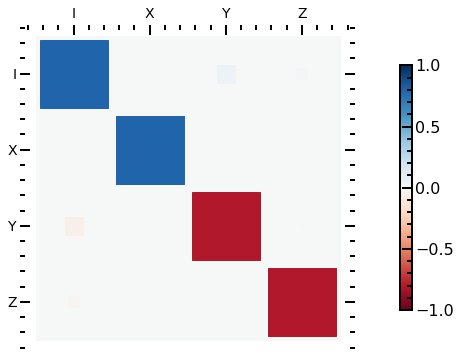

In [12]:
prep_ops = [qeye(2), rx(np.pi/2), ry(-np.pi/2), sigmax()]
meas_ops = [qeye(2), sigmax(), sigmay(), sigmaz()]
p_in = np.zeros((4,4), dtype = complex)
p_out = np.zeros((4,4), dtype = complex)

for i, prep in enumerate(prep_ops):
    psi_ini = prep*state_0
    evol_states = gates.evolution_psi_microwave_diss(H_nodrive, H_drive, psi0 =psi_ini, t_points=t_points, c_ops = c_ops_func(t1, t2),
                                            T_gate=T_gate, shape=shape, omega_d=drive_freq)
    for j, meas in enumerate(meas_ops):
        p_in[i,j] = expect(meas, psi_ini)
        p_out[i,j] = expect(meas, evol_states[-1])
        
ptm_real =  np.linalg.lstsq(p_out, p_in)[0]   

# Make physical
pm = ptm_real
choi_matrix = tomography.ptm_to_choi(pm)
choi_physical = tomography.project_and_normalize_density_matrix(choi_matrix)
pm_physical = tomography.choi_to_ptm(choi_physical)
ptm_real = pm_physical

op_label = ["I","X","Y","Z"]
qutip.hinton(ptm_real, xlabels = op_label, ylabels = op_label)       

<ipython-input-13-d551d424cd15>:10: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  ptm_ideal =  np.linalg.lstsq(p_out, p_in)[0]


0.9986293372816554


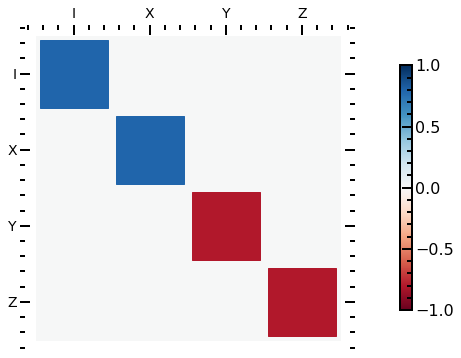

In [13]:
#Ideal PTM
for i, prep in enumerate(prep_ops):
    psi_ini = prep*state_0
    evol_states = gates.evolution_psi_microwave_diss(H_nodrive, H_drive, psi0 = psi_ini, t_points=t_points, c_ops = c_ops_func(t1, t2),
                                            T_gate=T_gate, shape=shape, omega_d=drive_freq)
    for j, meas in enumerate(meas_ops):
        p_in[i,j] = expect(meas, psi_ini)
        p_out[i,j] = expect(meas, sigmax() * psi_ini)
        
ptm_ideal =  np.linalg.lstsq(p_out, p_in)[0]  
op_label = ["I","X","Y","Z"]
qutip.hinton(ptm_ideal, xlabels = op_label, ylabels = op_label)  


print (tomography.process_fidelity(ptm_real, ptm_ideal))

In [14]:
t_coh = np.linspace(1e3, 10e3, 10)
fidel = np.zeros_like(t_coh)

for idx, t in enumerate(t_coh):
    c_ops = c_ops_func (10e6, t)
    overlap = 0
    for psi in psi_ini:
        evol_ideal = gates.evolution_psi_microwave(H_nodrive, H_drive, psi0=psi, t=t_points,
                                                T_gate=T_gate, shape=shape, omega_d=drive_freq)[-1]
        rho_ideal = ket2dm(evol_ideal)
        rho_real = gates.evolution_psi_microwave_diss(H_nodrive, H_drive, psi0=psi, t=t_points, c_ops= c_ops,
                                                T_gate=T_gate, shape=shape, omega_d=drive_freq)[-1]
        overlap = overlap + (rho_real*rho_ideal).tr()
    fidel[idx] = abs(overlap)/6.0
    
gamma1 = 1.0/1e6
gamma2 = 1.0/t_coh
gamma_phi = gamma2 - gamma1/2.0
T_err = (gamma_phi+gamma1)**-1.0*3

AttributeError: 'numpy.ndarray' object has no attribute 'isket'

In [ ]:
plt.figure(figsize = [7,5])
plt.semilogy(t_coh/1e3, 1-fidel, label = 'QuTiP')
plt.semilogy(t_coh/1e3, T_gate/T_err, label = 'UCSB formula')
# plt.semilogy(t_coh/1e3, T_gate/t_coh, label = r'$T_g/T_2$')
plt.xlabel(r'$T_2~(\mathrm{\mu s})$')
plt.ylabel('Gate error')
plt.ylim([5e-4,1e-2])
plt.xlim([t_coh[0]/1e3,t_coh[-1]/1e3])
plt.legend()
plt.title('SQG decoherence error')

## Three qubits

In [ ]:
sz1 = tensor(sigmaz(), identity(2), identity(2))
sz2 = tensor(identity(2), sigmaz(), identity(2))
sz3 = tensor(identity(2), identity(2), sigmaz())
sx1 = tensor(sigmax(), identity(2), identity(2))
sx2 = tensor(identity(2), sigmax(), identity(2))
sx3 = tensor(identity(2), identity(2), sigmax())
sm1 = tensor(sigmam(), identity(2), identity(2))
sm2 = tensor(identity(2), sigmam(), identity(2))
sm3 = tensor(identity(2), identity(2), sigmam())
    
def toffoli_H_coupled(freq1, freq2, freq3, g):
    return (0.5*freq1*sz1 + 0.5*freq2*sz2 + 0.5*freq3*sz3 + g*sx1*sx2 + g*sx2*sx3)

def toffoli_collapse_ops(t1,t2):
    gamma1 = 1.0/t1
    gamma2 = 1.0/t2
    gamma_phi = gamma2 - gamma1/2.0
    c1 = np.sqrt(gamma1)*(sm1 + sm2 + sm3)
    c2 = np.sqrt(gamma_phi/2.0) *(sz1 + sz2 + sz3)
    c_ops = [c1, c2]
    return c_ops

freq1 = 5.2541
freq2 = 5.331
freq3 = 5.491
g = 2.74 * 1e-3
T_gate = 340
shape = 'gauss'
drive_freq = freq2
drive_amp = 1
t_points = np.linspace(0, T_gate, 2 * int(T_gate) + 1)
H_nodrive = toffoli_H_coupled(freq1, freq2, freq3, g)
H_drive = drive_amp*(sx1 + sx3)
psi0 = tensor(basis(2,0),basis(2,0),basis(2,0))

t1_toff = 50e3
t2_toff = 60e3
c_ops_toff = toffoli_collapse_ops(t1_toff,t2_toff)

In [ ]:
overlap = 0
for p1_idx in range(6):
    for p2_idx in range(6):
        for p3_idx in range(6):
            psi_ini = tensor(rotation[p1_idx], rotation[p2_idx], rotation[p2_idx])*psi0
            evol_ideal = gates.evolution_psi_microwave(H_nodrive, H_drive, psi0=psi_ini, t=t_points,
                                                    T_gate=T_gate, shape=shape, omega_d=drive_freq)[-1]
            rho_ideal = ket2dm(evol_ideal)
            rho_real = gates.evolution_psi_microwave_diss(H_nodrive, H_drive, psi0=psi_ini, t=t_points, c_ops=c_ops_toff,
                                                    T_gate=T_gate, shape=shape, omega_d=drive_freq)[-1]
            overlap = overlap + (rho_real*rho_ideal).tr()
fidel = abs(overlap)/(6.0**3)
print (fidel)

In [ ]:
print (qutip.Options())

In [ ]:
import matplotlib as mpl
mpl.rcParams['figure.dpi']= 300
figpath = '/Users/longnguyen/Google Drive/LBL Research/Illustration/HCF paper/'
infidelity_array = np.load(figpath+'/CR_detune_vs_fidelity_variedJ_TLS.npy')
detuning_array = np.linspace(50,250,51)*1e-3

plt.figure(figsize = [5,4])
# plt.plot(detuning_array*1e3, infidelity_array[:,0], linewidth = 2, label = r'$J_C=1~\mathrm{MHz}$')
plt.plot(detuning_array*1e3, infidelity_array[:,1], linewidth = 2, label = r'$J_C=5~\mathrm{MHz}$')
# plt.plot(detuning_array*1e3, infidelity_array[:,2], linewidth = 2, label = r'$J_C=10~\mathrm{MHz}$')
plt.plot(detuning_array*1e3, infidelity_array[:,3], linewidth = 2, label = r'$J_C=20~\mathrm{MHz}$')
plt.yscale("log")
plt.xlabel(r"$\Delta/2\pi~\mathrm{(MHz)}$")
plt.ylabel(r'$1-\mathcal{F}$')
# plt.xlim([50,250])
# plt.ylim([5e-5,1e-2])
plt.legend()
plt.tight_layout()
figname = 'CR_gate5.pdf'
plt.savefig(figpath+figname)